# House Price Prediction

## Description

This project consists in creating different single predictive linear regression models in order to find a house sale price using:

**y = f(x) =  mx +b**

**Where:**
- y = dependent variable
- x = independent variable
- m = slope
- b = intercept

**"x"** and **"y"** will be part of the house dataset, and **"m"** and **"b"** will help us find the predicted value of the house. This means that **"m"** and **"b"** are the parameters of the model.

For the model to be able to predict house prices, these values and parameters are needed:
- y = Sale price of a house.
- x = A characteristic of some house.
- yhat = f(x) = estimated sale price of the house.
- m = slope needed to estimate sale price.
- b = intercept needed to estimate sale price.

The project will gather three different models as described below:
1. Sale price prediction using y = f(x) = mx + b
2. Base model of scikit-learn for linear regression
3. The average of the two models described in 1 and 2

## Libraries

The following libraries are used in this project:

| Librería       | Descripción                                        |
|----------------|----------------------------------------------------|
| numpy          | Data wrangling, operations and data structures     |
| scikit-learn   | For the linear regression model                    |
| matplotlib     | Data visualization                                 |
| seaborn        | Data visualization.                                |

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## House prices dataset

This dataset contains the prices and characteristics of some houses.

**Description:**
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

- OverallQual: Overall material and finish quality, rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
          
- 1stFlrSF: First Floor square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date
- LotFrontage: Linear feet of street connected to property



In [23]:
df = np.load(file = 'proyecto_training_data.npy')

In [26]:
df

array([[208500.,      7.,    856.,      8.,   2003.,     65.],
       [181500.,      6.,   1262.,      6.,   1976.,     80.],
       [223500.,      7.,    920.,      6.,   2001.,     68.],
       ...,
       [266500.,      7.,   1188.,      9.,   1941.,     66.],
       [142125.,      5.,   1078.,      5.,   1950.,     68.],
       [147500.,      5.,   1256.,      6.,   1965.,     75.]])

## Train and test data

The dataset will be split into two:
- Train(will have 80% of the data)
- Test (will have 20% of the data)

The **Train** dataset will be used to find **"m"** and **"b"** for the model and the **Test** dataset will be used to compare **"yhat"** (predicted sale price) and **"y"** the actual sale price.

In [70]:
train = {
    "SalePrice": np.array(df[0:int(len(df)*0.80),0]),
    "OverallQual": np.array(df[0:int(len(df)*0.80),1]),
    "1stFlrSF": np.array(df[0:int(len(df)*0.80),2]),
    "TotRmsAbvGrd": np.array(df[0:int(len(df)*0.80),3]),
    "YearBuilt": np.array(df[0:int(len(df)*0.80),4]),
    "LotFrontage": np.array(df[0:int(len(df)*0.80),5])
}
test = {
    "SalePrice": np.array(df[int(len(df)*0.80):len(df),0]),
    "OverallQual": np.array(df[int(len(df)*0.80):len(df),1]),
    "1stFlrSF": np.array(df[int(len(df)*0.80):len(df),2]),
    "TotRmsAbvGrd": np.array(df[int(len(df)*0.80):len(df),3]),
    "YearBuilt": np.array(df[int(len(df)*0.80):len(df),4]),
    "LotFrontage": np.array(df[int(len(df)*0.80):len(df),5])
}

## Exploratory data analysis (EDA)

Finding the mean, min value, max value, range and standard deviation:

In [161]:
stats = []
for i in train.keys():
    stats = np.hstack((stats,[{"Variable": i,
                          "Mean": np.round(np.nanmean(train[i]),2),
                          "Max": np.round(np.nanmax(train[i]),2),
                          "Min": np.round(np.nanmin(train[i]),2),
                          "Range": np.round(np.nanmax(train[i]) - np.nanmin(train[i]),2),
                          "Std": np.round(np.nanstd(train[i]),2)}]))
stats

array([{'Variable': 'SalePrice', 'Mean': 180590.28, 'Max': 755000.0, 'Min': 34900.0, 'Range': 720100.0, 'Std': 78781.95},
       {'Variable': 'OverallQual', 'Mean': 6.1, 'Max': 10.0, 'Min': 1.0, 'Range': 9.0, 'Std': 1.38},
       {'Variable': '1stFlrSF', 'Mean': 1156.32, 'Max': 3228.0, 'Min': 334.0, 'Range': 2894.0, 'Std': 373.62},
       {'Variable': 'TotRmsAbvGrd', 'Mean': 6.49, 'Max': 14.0, 'Min': 2.0, 'Range': 12.0, 'Std': 1.61},
       {'Variable': 'YearBuilt', 'Mean': 1971.45, 'Max': 2010.0, 'Min': 1875.0, 'Range': 135.0, 'Std': 29.94},
       {'Variable': 'LotFrontage', 'Mean': 69.95, 'Max': 313.0, 'Min': 21.0, 'Range': 292.0, 'Std': 23.47}],
      dtype=object)

### Distplots

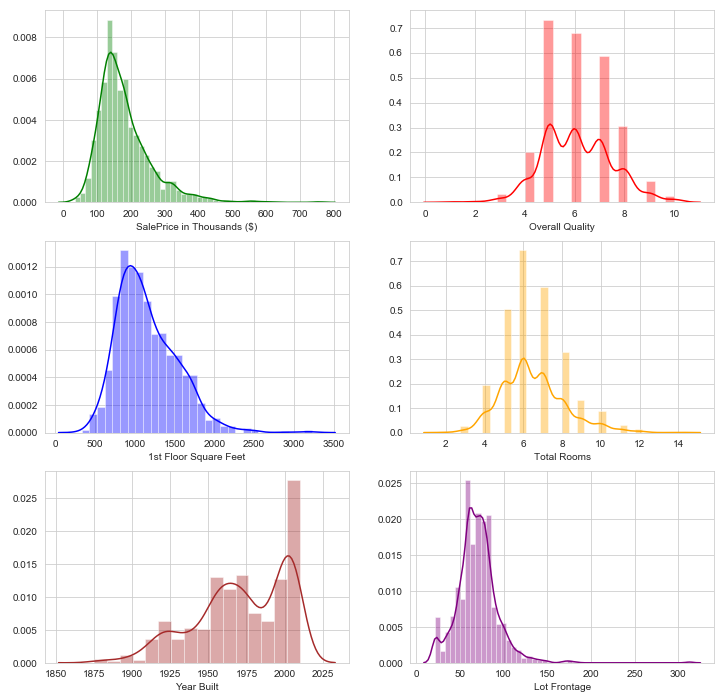

In [217]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.subplot(3,2,1)
sns.distplot(train['SalePrice']/1000, color="green", axlabel="SalePrice in Thousands ($)")
plt.subplot(3,2,2)
sns.distplot(train['OverallQual'], color="red", axlabel="Overall Quality")
plt.subplot(3,2,3)
sns.distplot(train['1stFlrSF'], color="blue", axlabel="1st Floor Square Feet")
plt.subplot(3,2,4)
sns.distplot(train['TotRmsAbvGrd'], color="orange", axlabel="Total Rooms")
plt.subplot(3,2,5)
sns.distplot(train['YearBuilt'], color="brown", axlabel="Year Built")
plt.subplot(3,2,6)
sns.distplot(train['LotFrontage'][~np.isnan(train['LotFrontage'])], color="purple", axlabel="Lot Frontage")

### Correlations

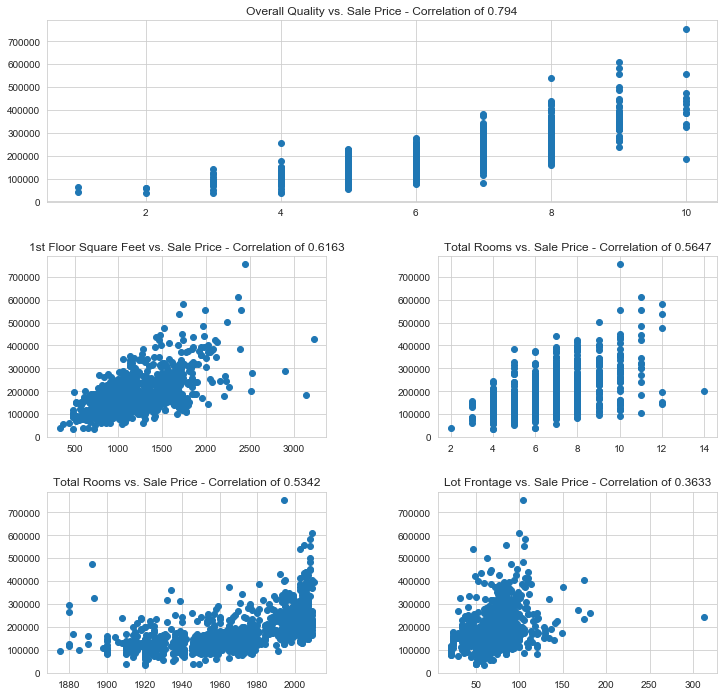

In [263]:
plt.figure(figsize=(12,12))
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0:])
plt.scatter(x=train['OverallQual'], y=train['SalePrice'])
plt.title('Overall Quality vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['OverallQual'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[1, 0])
plt.scatter(x=train['1stFlrSF'], y=train['SalePrice'])
plt.title('1st Floor Square Feet vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['1stFlrSF'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[1, 1])
plt.scatter(x=train['TotRmsAbvGrd'], y=train['SalePrice'])
plt.title('Total Rooms vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['TotRmsAbvGrd'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[2, 0])
plt.scatter(x=train['YearBuilt'], y=train['SalePrice'])
plt.title('Total Rooms vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['YearBuilt'], y=train['SalePrice'])[0,1],4)))
plt.subplot(grid[2, 1])
plt.scatter(x=train['LotFrontage'][~np.isnan(train['LotFrontage'])], y=train['SalePrice'][~np.isnan(train['LotFrontage'])])
plt.title('Lot Frontage vs. Sale Price - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['LotFrontage'][~np.isnan(train['LotFrontage'])], y=train['SalePrice'][~np.isnan(train['LotFrontage'])])[0,1],4)))
plt.show()

We can see that there is a higher correlation **Overall Quality** and **1st Floor Square Feet** variables. These are going to be the main variables for the model.